# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

What is the shape of df_yearly and df_monthly? How many rows and columns?

In [9]:
print(f" df_yearly: The number of columns {df_yearly.shape[1]} and the number of rows is {df_yearly.shape[0]}")
print(f" df_monthly : The number of columns {df_monthly.shape[1]} and the number of rows is {df_monthly.shape[0]}")

 df_yearly: The number of columns 4 and the number of rows is 12
 df_monthly : The number of columns 3 and the number of rows is 98


What are the column names?

In [10]:
print(f"df_yearly column names: {df_yearly.columns}")
print(f"df_monthly column names: {df_monthly.columns}")

df_yearly column names: Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
df_monthly column names: Index(['date', 'births', 'deaths'], dtype='object')


In [13]:
df_yearly.describe()

year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

In [16]:
df_monthly.tail()

date  births  deaths
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

In [17]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [18]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


### Check for Nan Values and Duplicates

In [20]:
df_monthly.isna().values.sum()

0

In [21]:
df_yearly.isna().values.sum()

0

In [22]:
df_monthly.duplicated().values.sum()

0

In [23]:
df_yearly.duplicated().values.sum()

0

### Descriptive Statistics

In [24]:
df_monthly.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

In [ ]:
average number of births that took place per month:267

In [ ]:
average number of deaths that took place per month:22.47

### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [31]:
print(f"mean percentage of death is {(22.47/267*100)}%")

mean percentage of death is 8.415730337078651%


In [32]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

In [33]:
df_monthly.head()

date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2

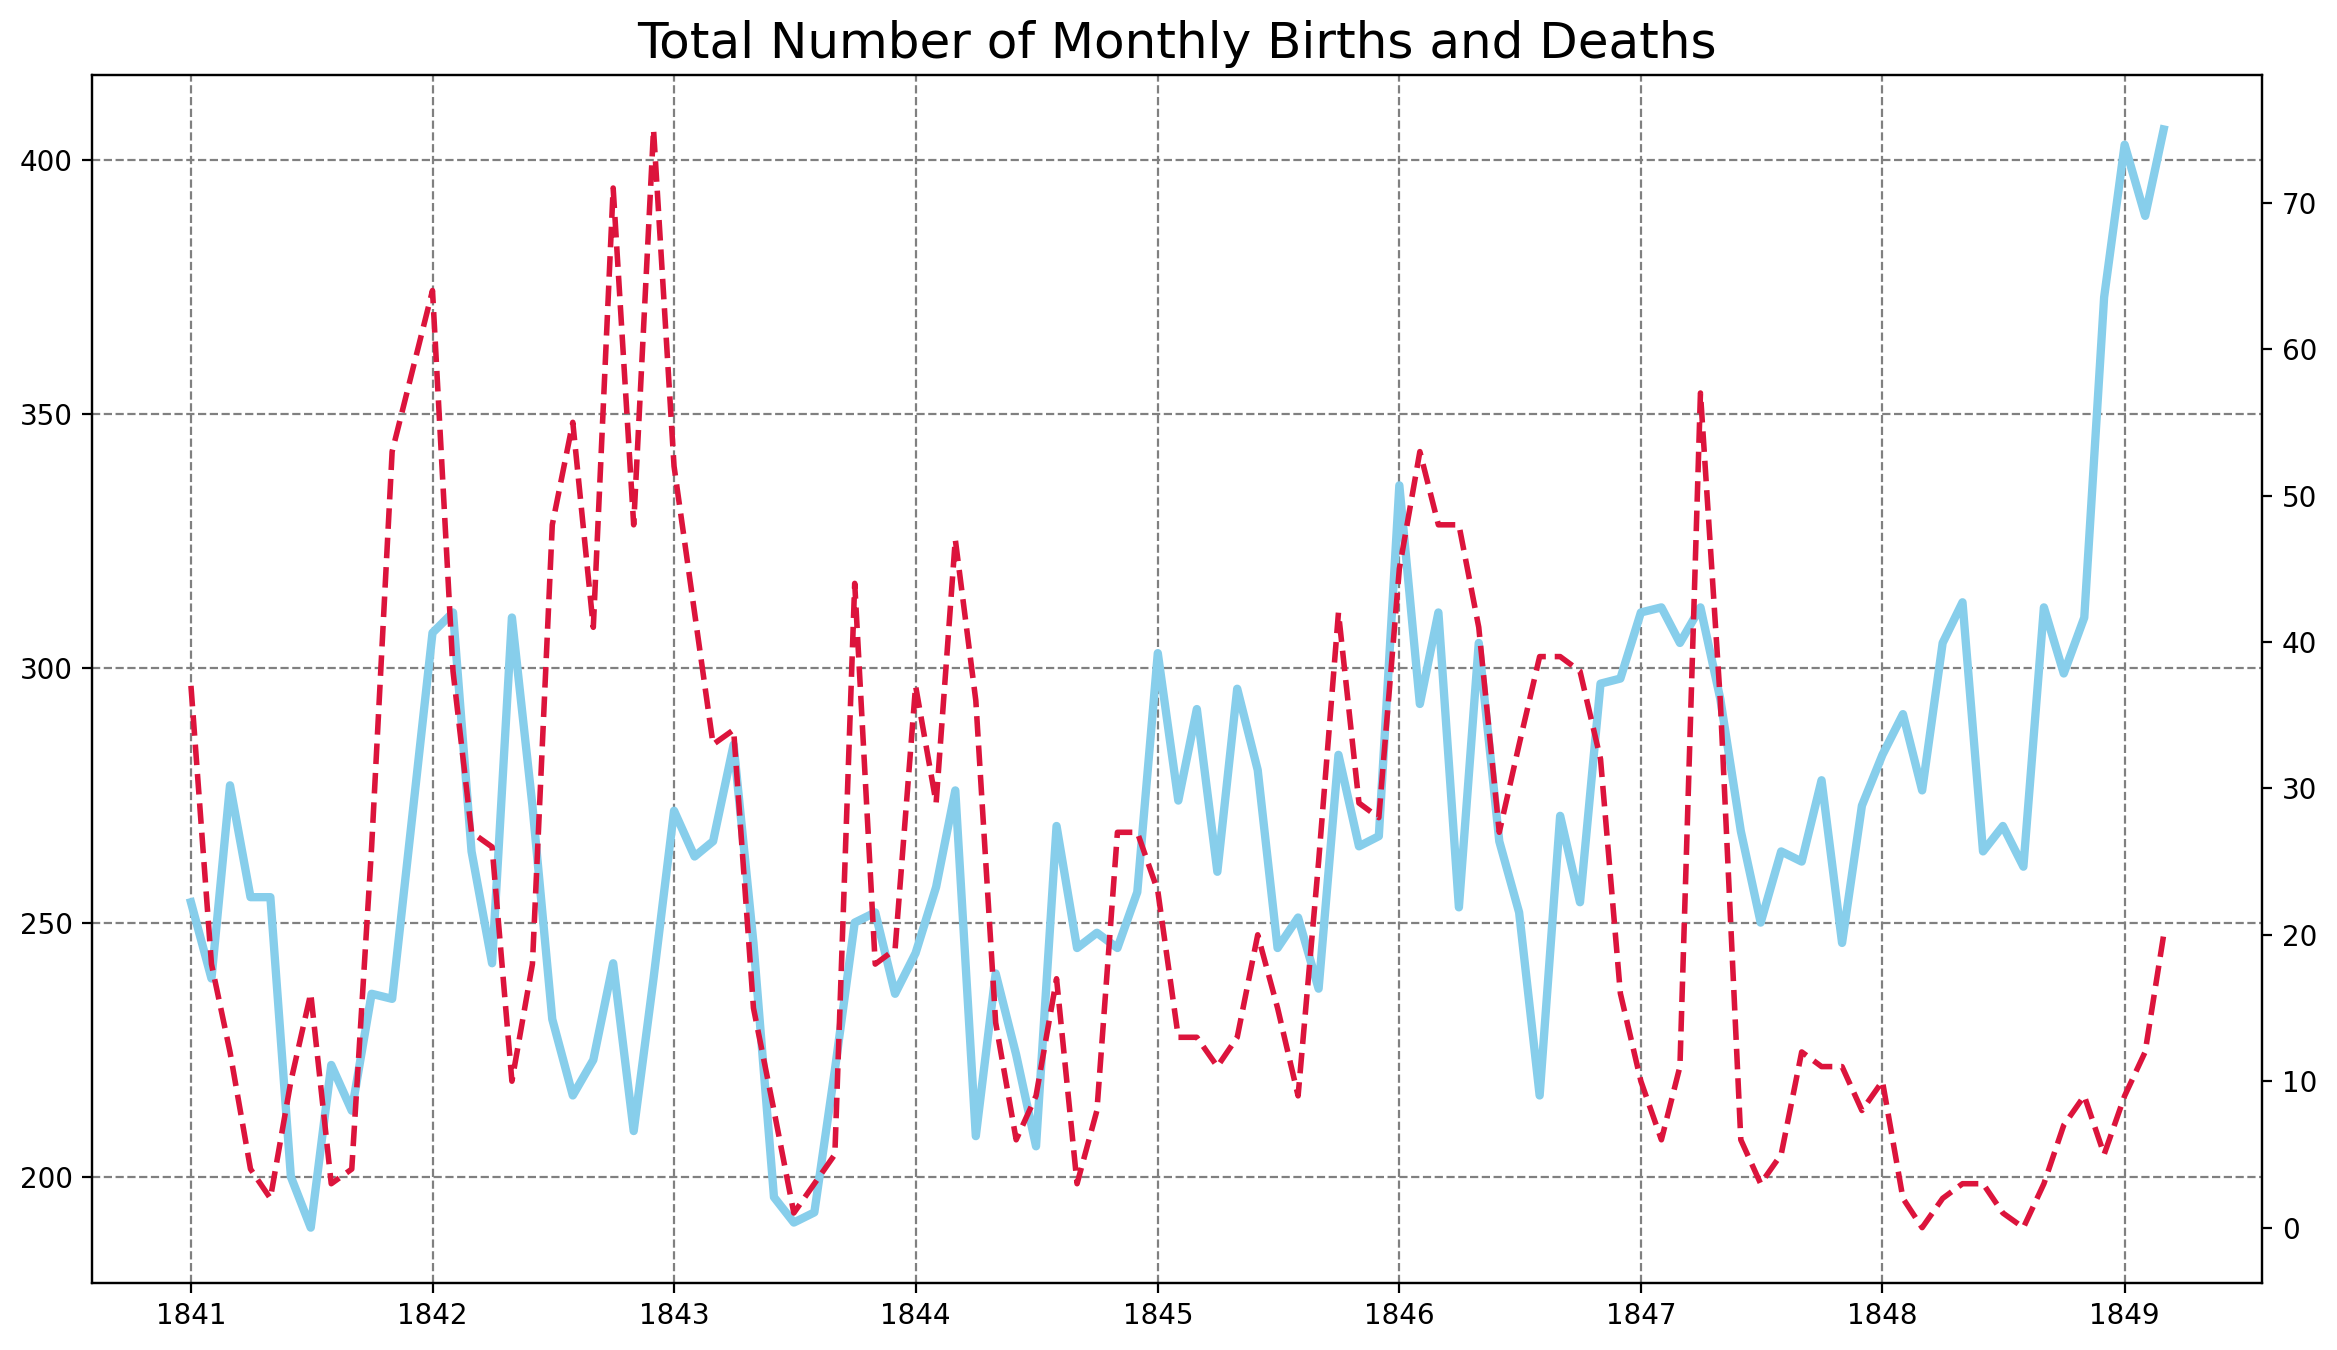

In [38]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)

ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
plt.show()

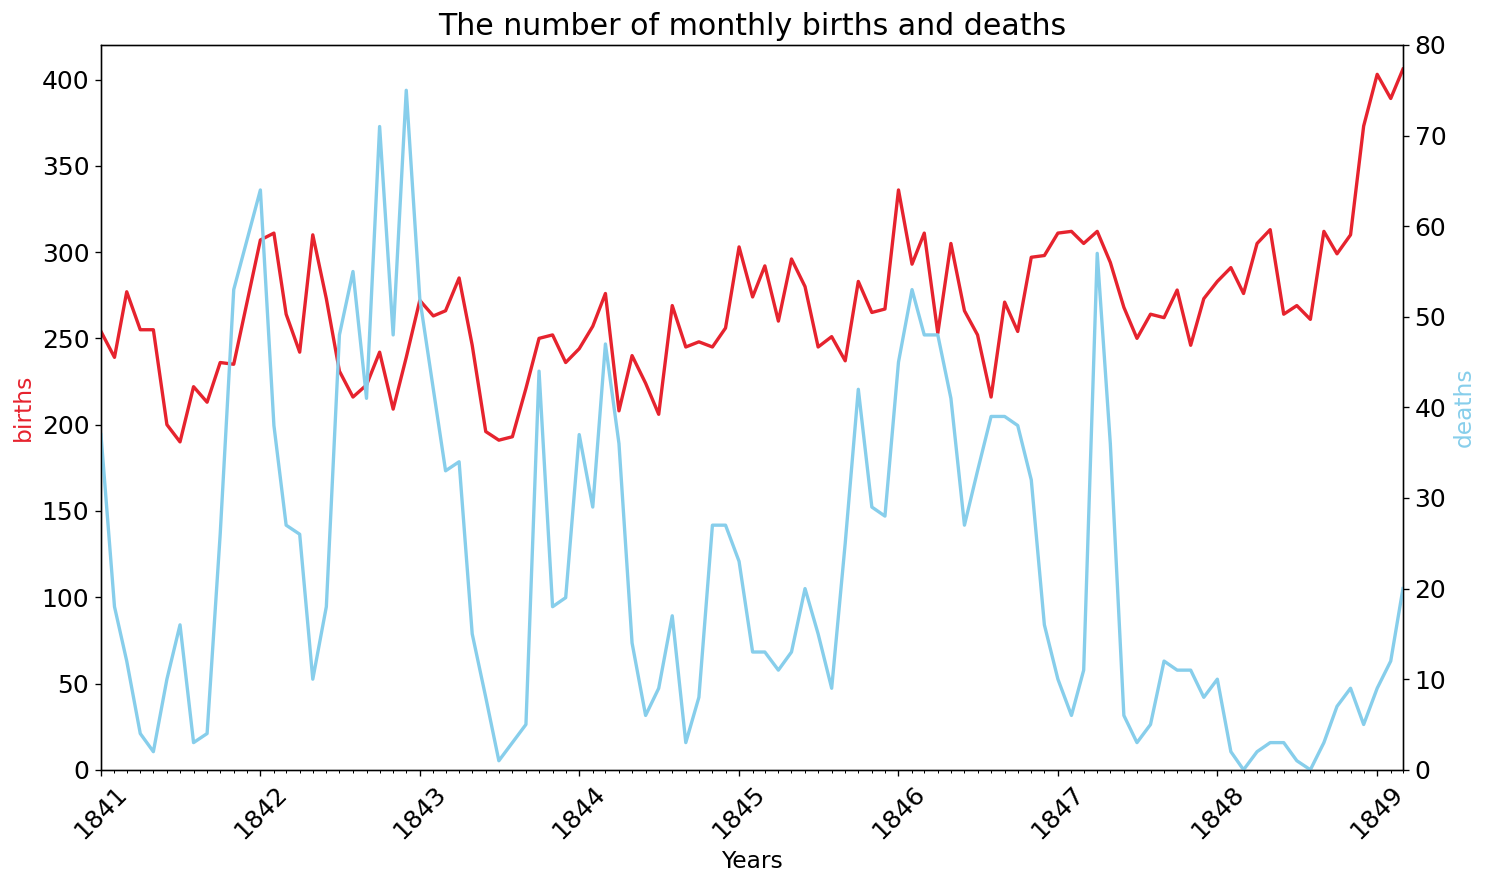

In [39]:
import matplotlib
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_ylim([0, 420])
ax2.set_ylim([0, 80])
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.plot(df_monthly['date'],df_monthly["births"],color='#E6232E',linewidth=2)
ax2.plot(df_monthly['date'],df_monthly["deaths"],color='skyblue',linewidth=2)
ax1.set_xlabel('Years', fontsize=14)
ax1.set_ylabel("births", fontsize=14,color='#E6232E')
ax2.set_ylabel("deaths", fontsize=14,color='skyblue')
ax1.tick_params(labelsize=15)
ax2.tick_params(axis='y',labelsize=15)
plt.title("The number of monthly births and deaths",  fontsize=18)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

What we see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births! 

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [42]:
df_yearly.head(12)

year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

In [65]:
df_clinic_1  = df_yearly[df_yearly.clinic == 'clinic 1']
df_clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']

In [66]:
df_clinic_1.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

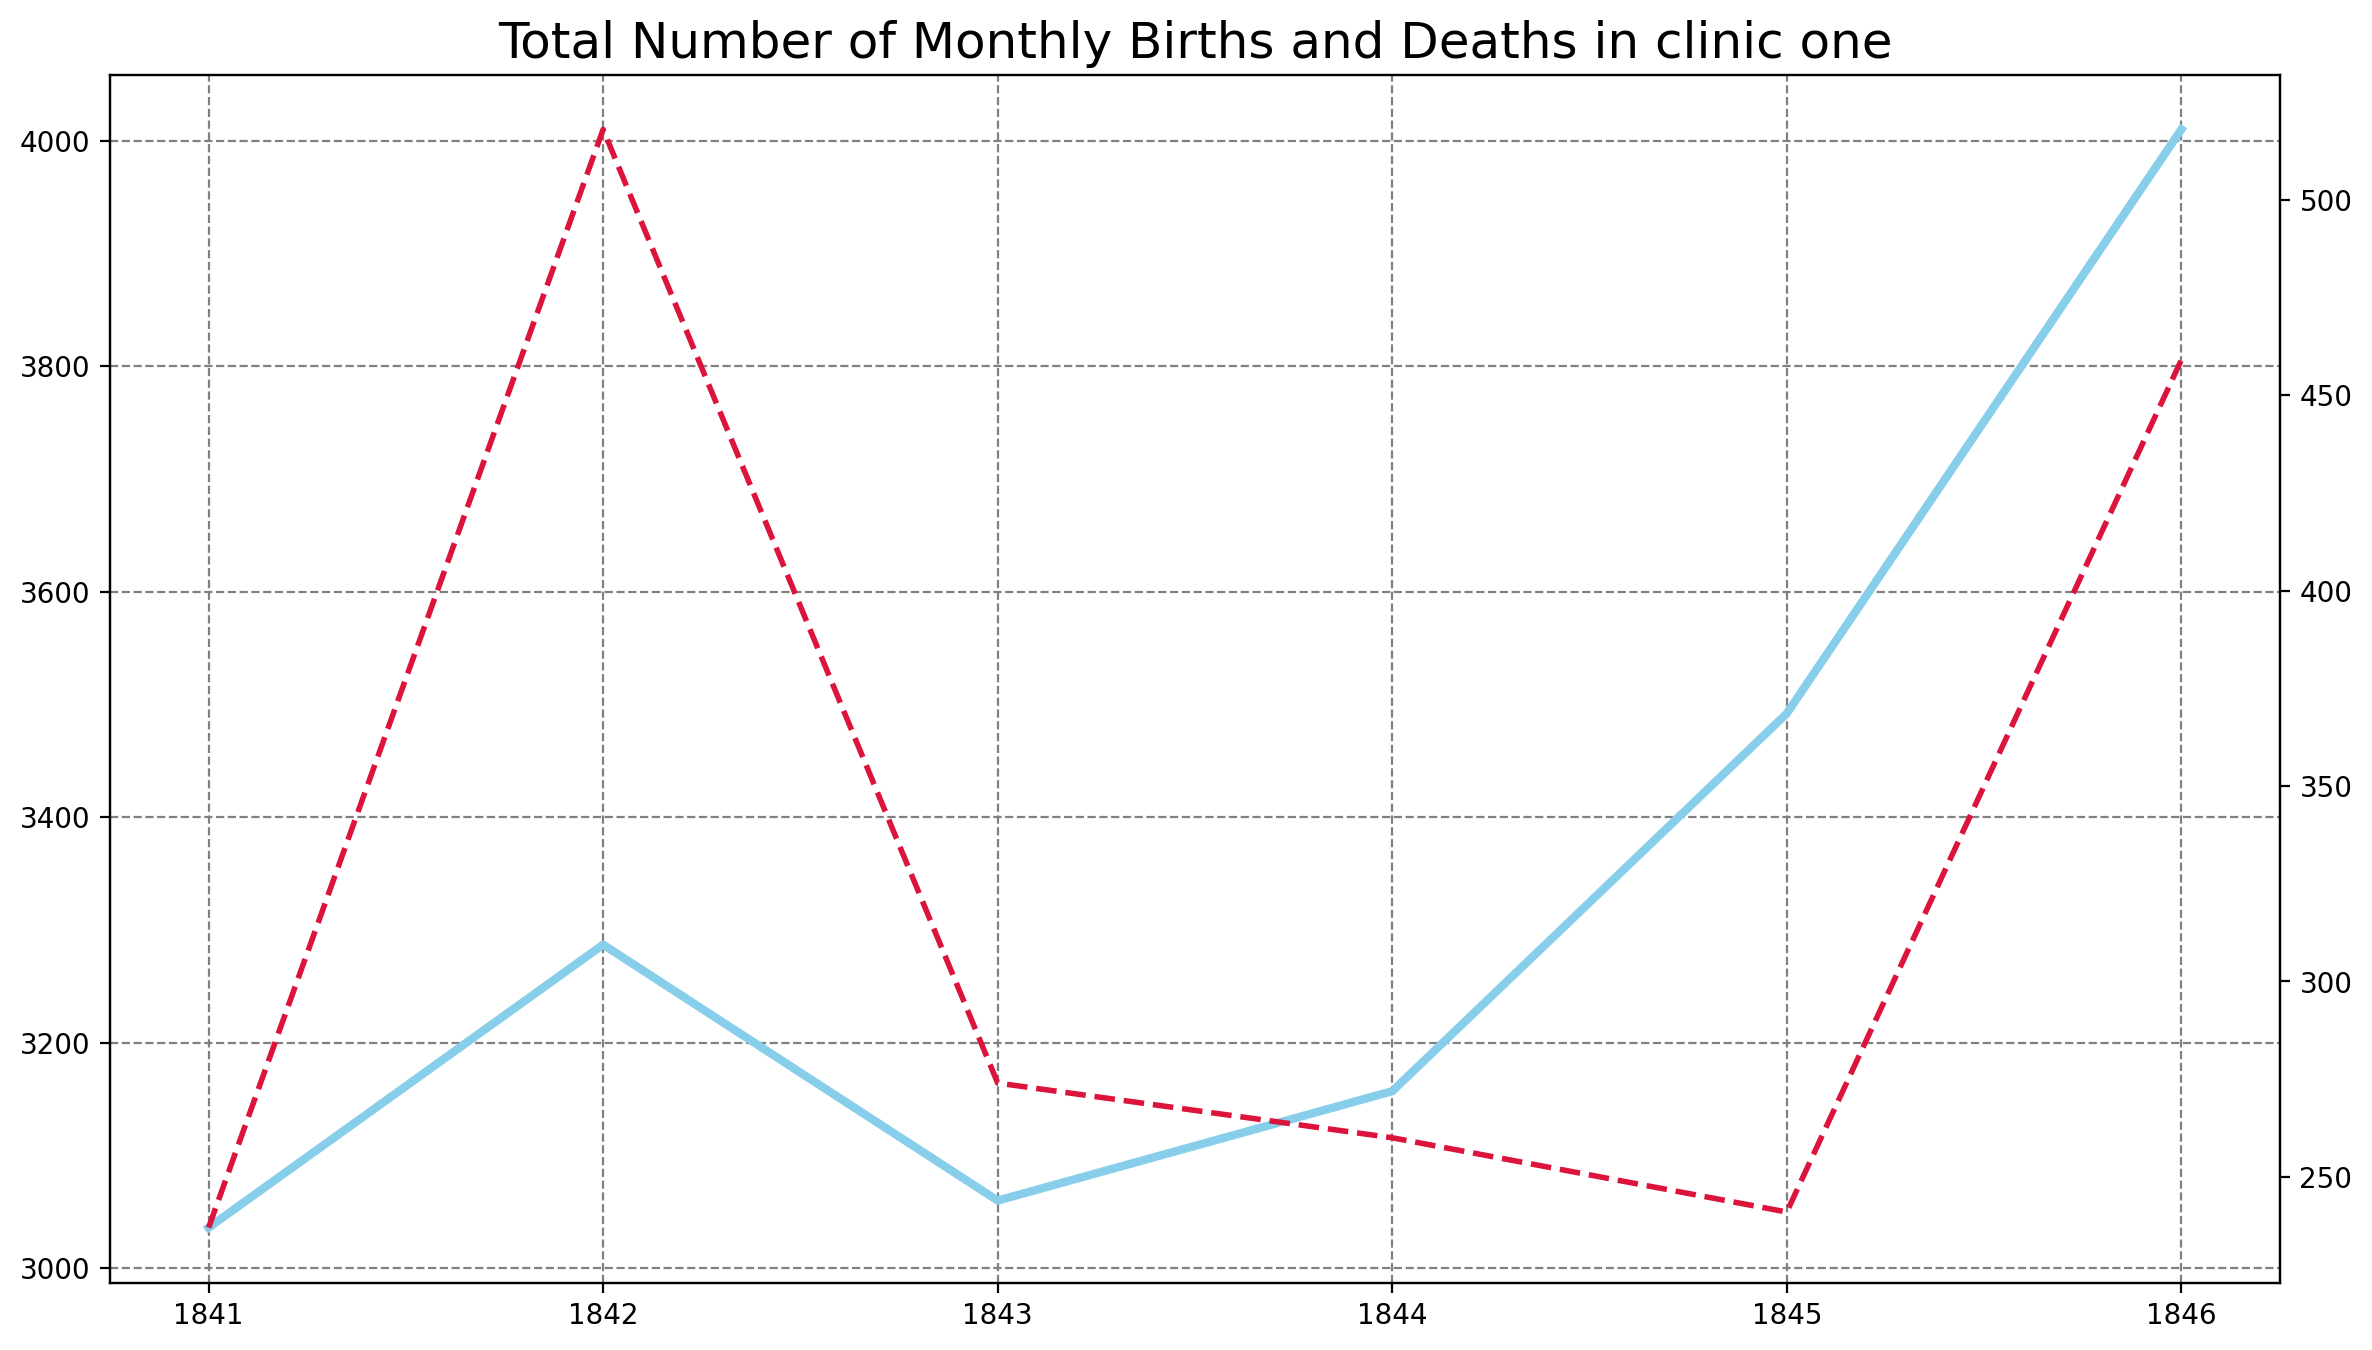

In [67]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths in clinic one', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_clinic_1.year, 
         df_clinic_1.births, 
         color='skyblue', 
         linewidth=3)

ax2.plot(df_clinic_1.year, 
         df_clinic_1.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
plt.show()


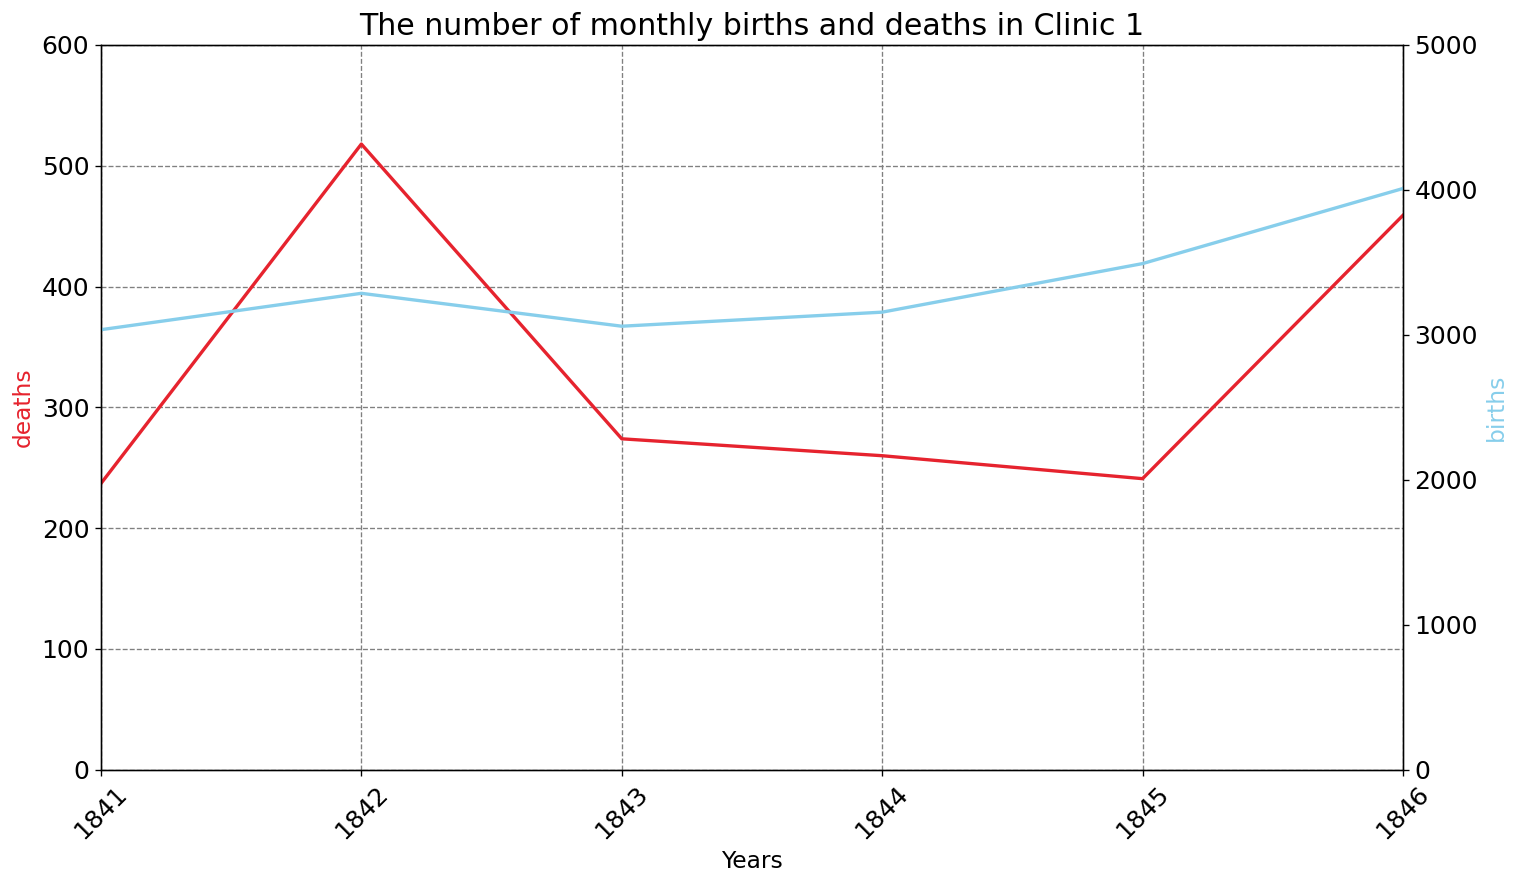

In [161]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)

ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_ylim([0, 600])
ax2.set_ylim([0, 5000])
ax1.grid(color='grey', linestyle='--')
ax1.set_xlim([df_clinic_1.year.min(), df_clinic_1.year.max()])
ax1.plot(df_clinic_1.year,df_clinic_1.deaths,color='#E6232E',linewidth=2)
ax2.plot(df_clinic_1.year,df_clinic_1.births,color='skyblue',linewidth=2)
ax1.set_xlabel('Years', fontsize=14)
ax1.set_ylabel("deaths", fontsize=14,color='#E6232E')
ax2.set_ylabel("births", fontsize=14,color='skyblue')
ax1.tick_params(labelsize=15)
ax2.tick_params(axis='y',labelsize=15)
plt.title("The number of monthly births and deaths in Clinic 1",  fontsize=18)
# ax1.xaxis.set_major_locator(years)
# ax1.xaxis.set_major_formatter(years_fmt)
# ax1.xaxis.set_minor_locator(months)
plt.show()

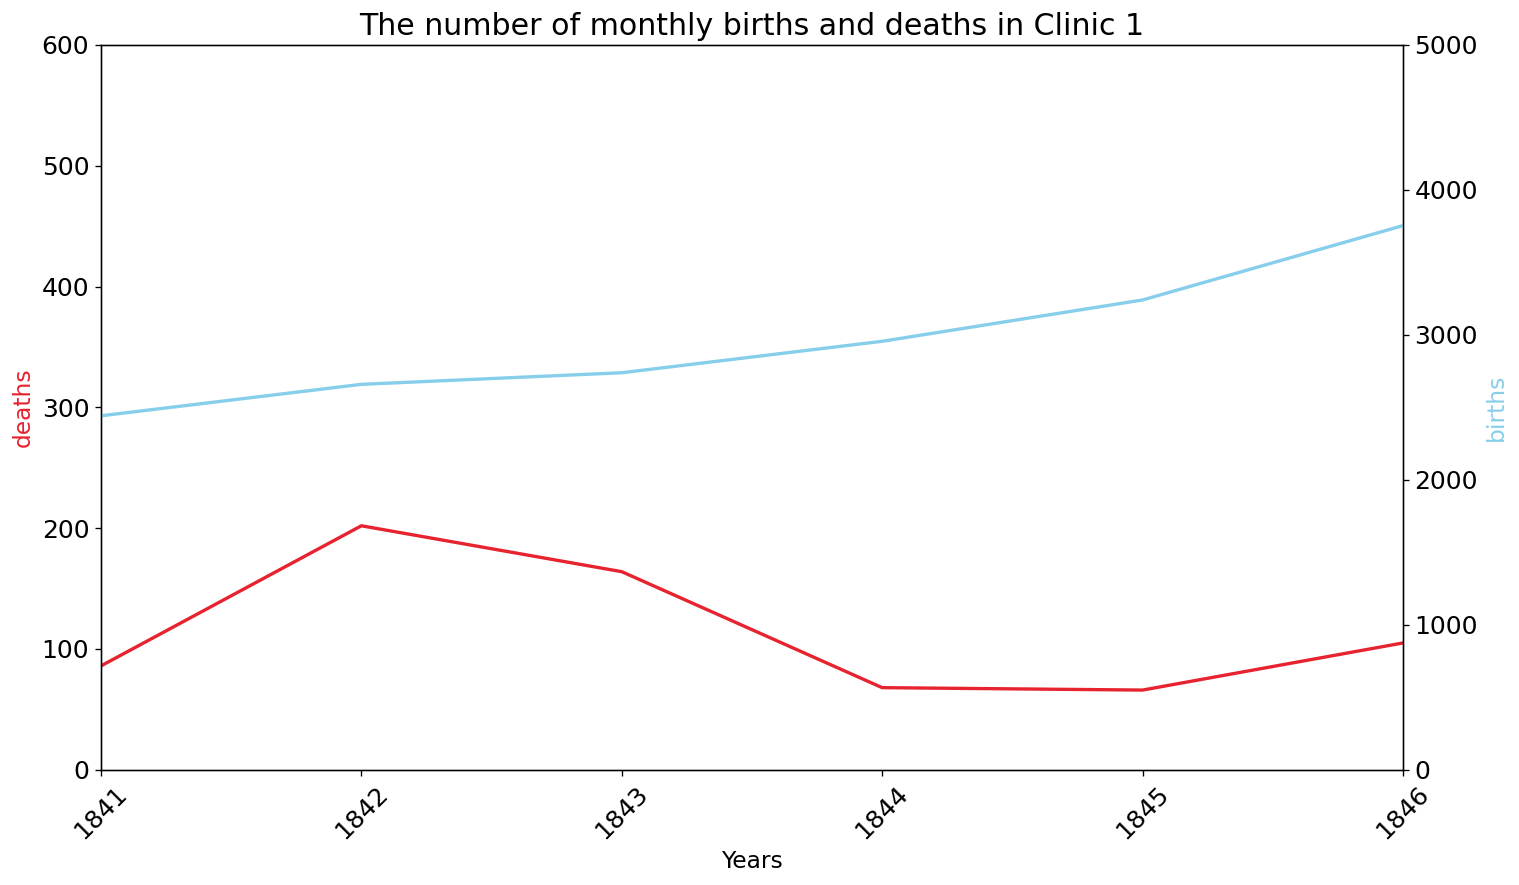

In [160]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)

ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_ylim([0, 600])
ax2.set_ylim([0, 5000])

ax1.set_xlim([df_clinic_2.year.min(), df_clinic_2.year.max()])
ax1.plot(df_clinic_2.year,df_clinic_2.deaths,color='#E6232E',linewidth=2)
ax2.plot(df_clinic_2.year,df_clinic_2.births,color='skyblue',linewidth=2)
ax1.set_xlabel('Years', fontsize=14)
ax1.set_ylabel("deaths", fontsize=14,color='#E6232E')
ax2.set_ylabel("births", fontsize=14,color='skyblue')
ax1.tick_params(labelsize=15)
ax2.tick_params(axis='y',labelsize=15)
plt.title("The number of monthly births and deaths in Clinic 1",  fontsize=18)
# ax1.xaxis.set_major_locator(years)
# ax1.xaxis.set_major_formatter(years_fmt)
# ax1.xaxis.set_minor_locator(months)
plt.show()

There are two maternity wards at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.

In [72]:
df_clinic_1.describe()

year   births  deaths
count     6.00     6.00    6.00
mean  1,843.50 3,340.33  331.50
std       1.87   368.54  123.76
min   1,841.00 3,036.00  237.00
25%   1,842.25 3,084.25  245.75
50%   1,843.50 3,222.00  267.00
75%   1,844.75 3,440.75  412.75
max   1,846.00 4,010.00  518.00

In [73]:
df_clinic_2.describe()

year   births  deaths
count     6.00     6.00    6.00
mean  1,843.50 2,965.17  115.17
std       1.87   472.66   55.72
min   1,841.00 2,442.00   66.00
25%   1,842.25 2,679.00   72.50
50%   1,843.50 2,847.50   95.50
75%   1,844.75 3,169.75  149.25
max   1,846.00 3,754.00  202.00

In [76]:
df_yearly.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [77]:
l_chart = px.line(df_yearly,
                  x='year', 
                  y='births',
                  color='clinic',
                  hover_name='clinic')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Births')
 
l_chart.show()

In [78]:
l_chart = px.line(df_yearly,
                  x='year', 
                  y='deaths',
                  color='clinic',
                  hover_name='clinic')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Births')
 
l_chart.show()

We see that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.
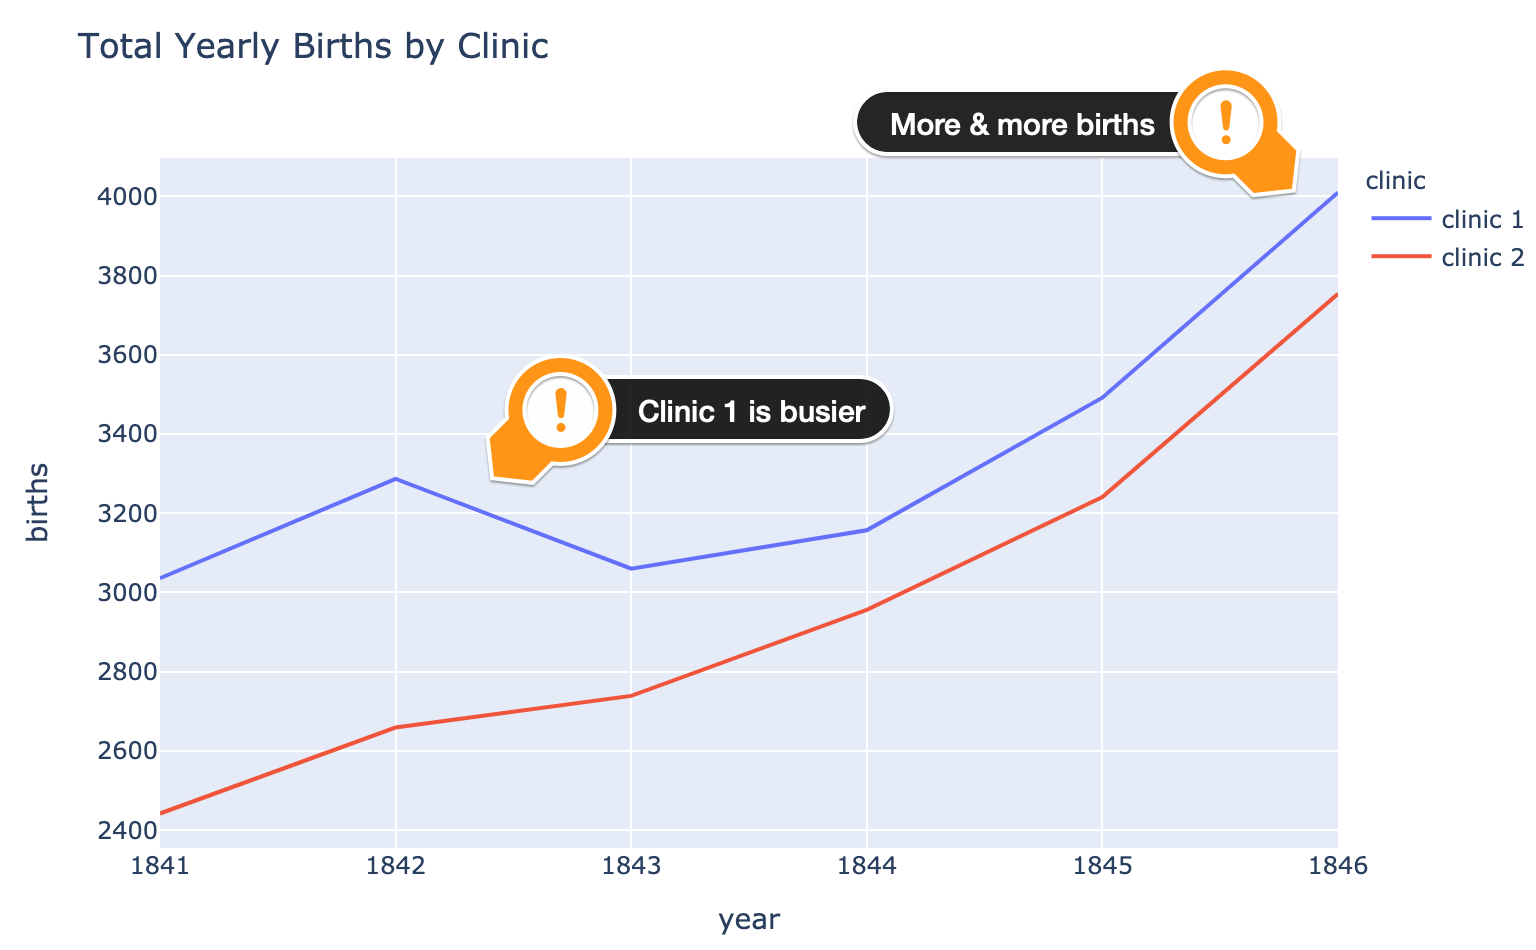

To compare apples and apples, we need to look at the proportion of deaths per clinic:

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [252]:
df_yearly["pct_deaths"] = df_yearly.deaths/df_yearly.births*100

In [253]:
df_yearly

year  births  deaths    clinic  pct_deaths
0   1841    3036     237  clinic 1        7.81
1   1842    3287     518  clinic 1       15.76
2   1843    3060     274  clinic 1        8.95
3   1844    3157     260  clinic 1        8.24
4   1845    3492     241  clinic 1        6.90
5   1846    4010     459  clinic 1       11.45
6   1841    2442      86  clinic 2        3.52
7   1842    2659     202  clinic 2        7.60
8   1843    2739     164  clinic 2        5.99
9   1844    2956      68  clinic 2        2.30
10  1845    3241      66  clinic 2        2.04
11  1846    3754     105  clinic 2        2.80

In [254]:
l_chart = px.line(df_yearly,
                  x='year', 
                  y='pct_deaths',
                  color='clinic',
                  hover_name='clinic')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='pct_deaths')
 
l_chart.show()

all the answers can be found in:

In [255]:
print(f'clinic 1 \n {df_clinic_1.describe()} \n\n clinic 2 \n {df_clinic_2.describe()}')

clinic 1 
           year   births  deaths
count     6.00     6.00    6.00
mean  1,843.50 3,340.33  331.50
std       1.87   368.54  123.76
min   1,841.00 3,036.00  237.00
25%   1,842.25 3,084.25  245.75
50%   1,843.50 3,222.00  267.00
75%   1,844.75 3,440.75  412.75
max   1,846.00 4,010.00  518.00 

 clinic 2 
           year   births  deaths
count     6.00     6.00    6.00
mean  1,843.50 2,965.17  115.17
std       1.87   472.66   55.72
min   1,841.00 2,442.00   66.00
25%   1,842.25 2,679.00   72.50
50%   1,843.50 2,847.50   95.50
75%   1,844.75 3,169.75  149.25
max   1,846.00 3,754.00  202.00


In [256]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [257]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


Still, clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis.

The story continues...

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 😮

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time.

In [258]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [259]:
df_monthly.head()

date  births  deaths  pct_deaths washing_hands
0 1841-01-01     254      37       14.57            No
1 1841-02-01     239      18        7.53            No
2 1841-03-01     277      12        4.33            No
3 1841-04-01     255       4        1.57            No
4 1841-05-01     255       2        0.78            No

In [260]:
df_monthly["pct_deaths"] = (df_monthly.deaths / df_monthly.births) *100

In [261]:
df_monthly_before = df_monthly[df_monthly.date < handwashing_start]

In [262]:
df_monthly_before.head()

date  births  deaths  pct_deaths washing_hands
0 1841-01-01     254      37       14.57            No
1 1841-02-01     239      18        7.53            No
2 1841-03-01     277      12        4.33            No
3 1841-04-01     255       4        1.57            No
4 1841-05-01     255       2        0.78            No

In [263]:
df_monthly_after = df_monthly[df_monthly.date > handwashing_start]

In [264]:
df_monthly_before.describe()

births  deaths  pct_deaths
count   76.00   76.00       76.00
mean   257.51   27.11       10.50
std     34.28   17.94        7.07
min    190.00    1.00        0.52
25%    236.75   11.75        4.39
50%    254.50   26.50       10.52
75%    280.75   39.50       15.01
max    336.00   75.00       31.38

In [265]:
df_monthly_after.describe()

births  deaths  pct_deaths
count   21.00   21.00       21.00
mean   301.29    6.48        2.10
std     49.80    5.10        1.56
min    246.00    0.00        0.00
25%    264.00    3.00        0.96
50%    283.00    5.00        1.89
75%    312.00   10.00        3.08
max    406.00   20.00        4.93

### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [266]:
roll_df = df_monthly.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [267]:
roll_df.tail(15)

births  deaths  pct_deaths
date                                  
1848-01-01  267.67    9.50        3.56
1848-02-01  272.17    9.00        3.36
1848-03-01  274.50    7.00        2.60
1848-04-01  279.00    5.50        2.05
1848-05-01  290.17    4.17        1.46
1848-06-01  288.67    3.33        1.16
1848-07-01  286.33    1.83        0.63
1848-08-01  281.33    1.50        0.52
1848-09-01  287.33    2.00        0.68
1848-10-01  286.33    2.83        0.96
1848-11-01  285.83    3.83        1.29
1848-12-01  304.00    4.17        1.32
1849-01-01  326.33    5.50        1.63
1849-02-01  347.67    7.50        2.14
1849-03-01  363.33   10.33        2.80

In [268]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [269]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [270]:
roll_df.tail(15)

births  deaths  pct_deaths
date                                  
1846-03-01  292.50   40.83       13.86
1846-04-01  287.50   41.83       14.55
1846-05-01  294.17   43.83       14.97
1846-06-01  294.00   43.67       14.91
1846-07-01  280.00   41.67       14.86
1846-08-01  267.17   39.33       14.86
1846-09-01  260.50   37.83       14.68
1846-10-01  260.67   36.17       14.02
1846-11-01  259.33   34.67       13.57
1846-12-01  264.67   32.83       12.77
1847-01-01  274.50   29.00       11.13
1847-02-01  290.50   23.50        8.44
1847-03-01  296.17   18.83        6.64
1847-04-01  305.83   22.00        7.19
1847-05-01  305.33   22.67        7.44

In [271]:
roll_df.index

DatetimeIndex(['1841-01-01', '1841-02-01', '1841-03-01', '1841-04-01',
               '1841-05-01', '1841-06-01', '1841-07-01', '1841-08-01',
               '1841-09-01', '1841-10-01', '1841-11-01', '1842-01-01',
               '1842-02-01', '1842-03-01', '1842-04-01', '1842-05-01',
               '1842-06-01', '1842-07-01', '1842-08-01', '1842-09-01',
               '1842-10-01', '1842-11-01', '1842-12-01', '1843-01-01',
               '1843-02-01', '1843-03-01', '1843-04-01', '1843-05-01',
               '1843-06-01', '1843-07-01', '1843-08-01', '1843-09-01',
               '1843-10-01', '1843-11-01', '1843-12-01', '1844-01-01',
               '1844-02-01', '1844-03-01', '1844-04-01', '1844-05-01',
               '1844-06-01', '1844-07-01', '1844-08-01', '1844-09-01',
               '1844-10-01', '1844-11-01', '1844-12-01', '1845-01-01',
               '1845-02-01', '1845-03-01', '1845-04-01', '1845-05-01',
               '1845-06-01', '1845-07-01', '1845-08-01', '1845-09-01',
      

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

In [272]:
df_roll.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75],
           dtype='int64')

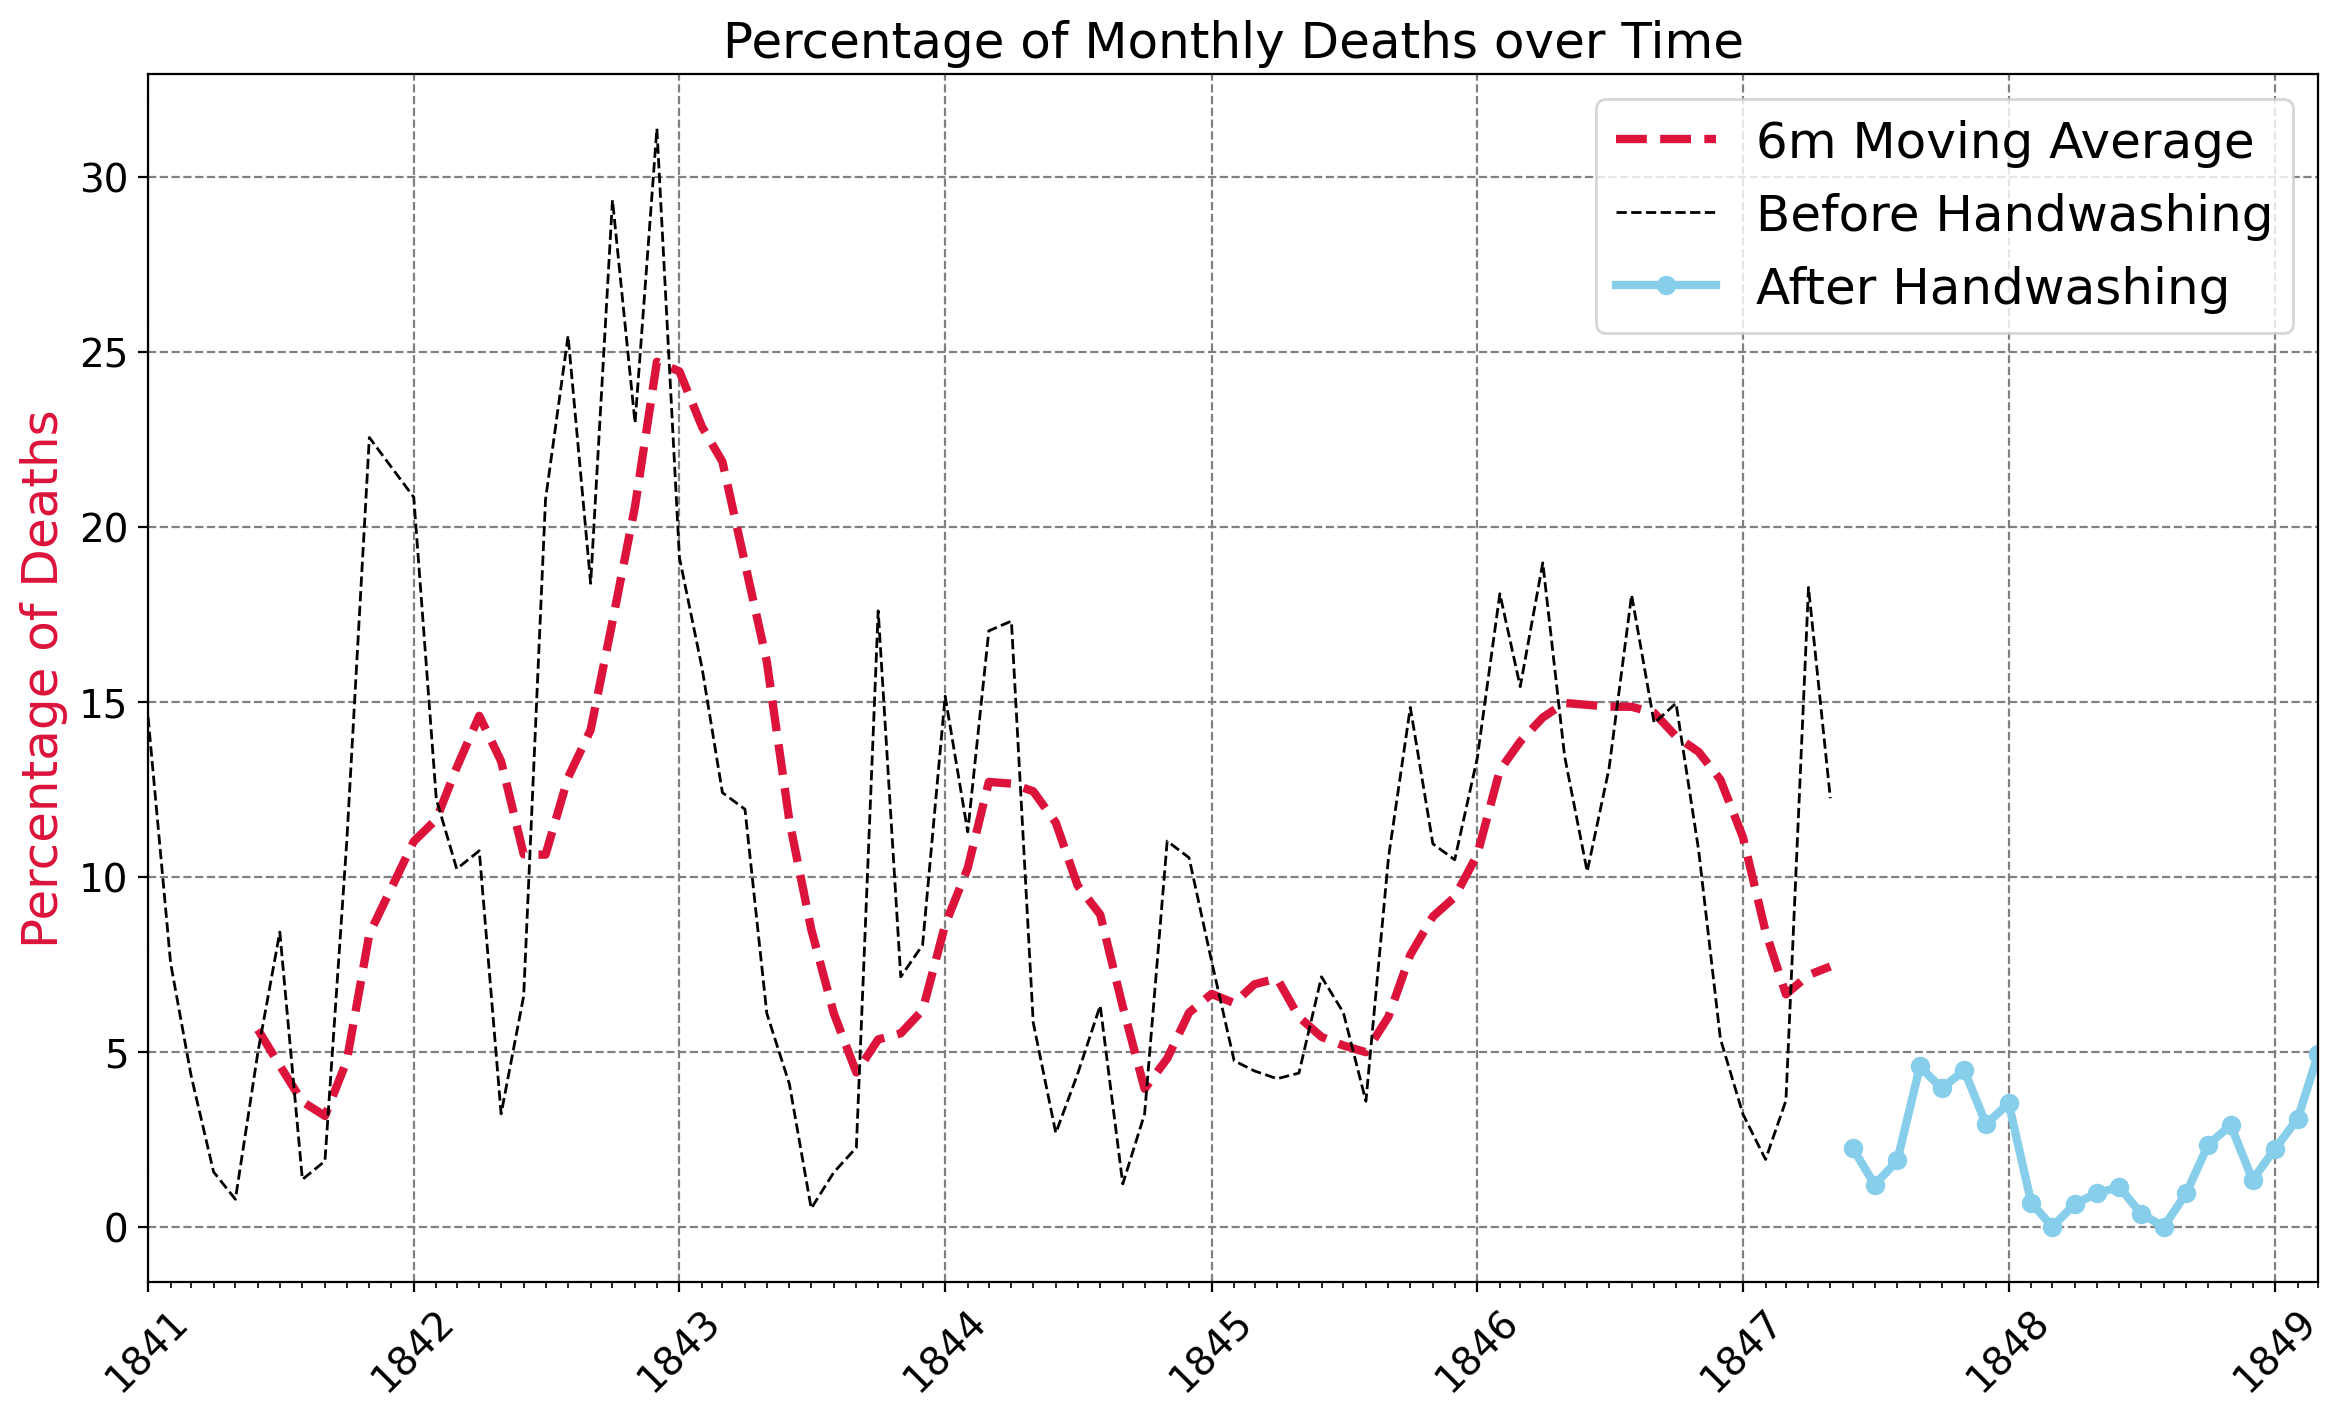

In [273]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

plt.grid(color='grey', linestyle='--')

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()
# plt.plot(df_monthly_before.date, df_monthly_before.pct_deaths, color='green', linewidth=3, label='Before Handwashing')
# plt.plot(df_monthly_after.date, df_monthly_after.pct_deaths, color='skyblue', linewidth=3, label='After Handwashing')
# plt.plot(roll_df.index, roll_df.pct_deaths, color='red', linewidth=3, label='6, Moving Average')
# plt.legend()
# ax1.plot(df_monthly.date, 
#          df_monthly.deaths, 
#          color='crimson', 
#          linewidth=2, 
#          linestyle='--')
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [274]:
before_washing.describe()

births  deaths  pct_deaths
count   76.00   76.00       76.00
mean   257.51   27.11       10.50
std     34.28   17.94        7.07
min    190.00    1.00        0.52
25%    236.75   11.75        4.39
50%    254.50   26.50       10.52
75%    280.75   39.50       15.01
max    336.00   75.00       31.38

In [275]:
after_washing.describe()

births  deaths  pct_deaths
count   22.00   22.00       22.00
mean   299.77    6.45        2.11
std     49.11    4.97        1.52
min    246.00    0.00        0.00
25%    265.00    3.00        0.96
50%    280.50    5.50        2.06
75%    311.50    9.75        3.05
max    406.00   20.00        4.93

In [276]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 1.05e+03%.
Chance of death during childbirth AFTER handwashing: 2.11e+02%.
Handwashing reduced the monthly proportion of deaths by 8.4e+02%!
This is a 5.0x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [277]:
df_monthly['washing_hands']= np.where(df_monthly.date < handwashing_start, 'No','Yes')

In [278]:
import plotly.express as px
box = px.box(df_monthly, x='washing_hands', y='pct_deaths', color='washing_hands', title='How Have the Stats Changed with Handwashing?')
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
fig.show()

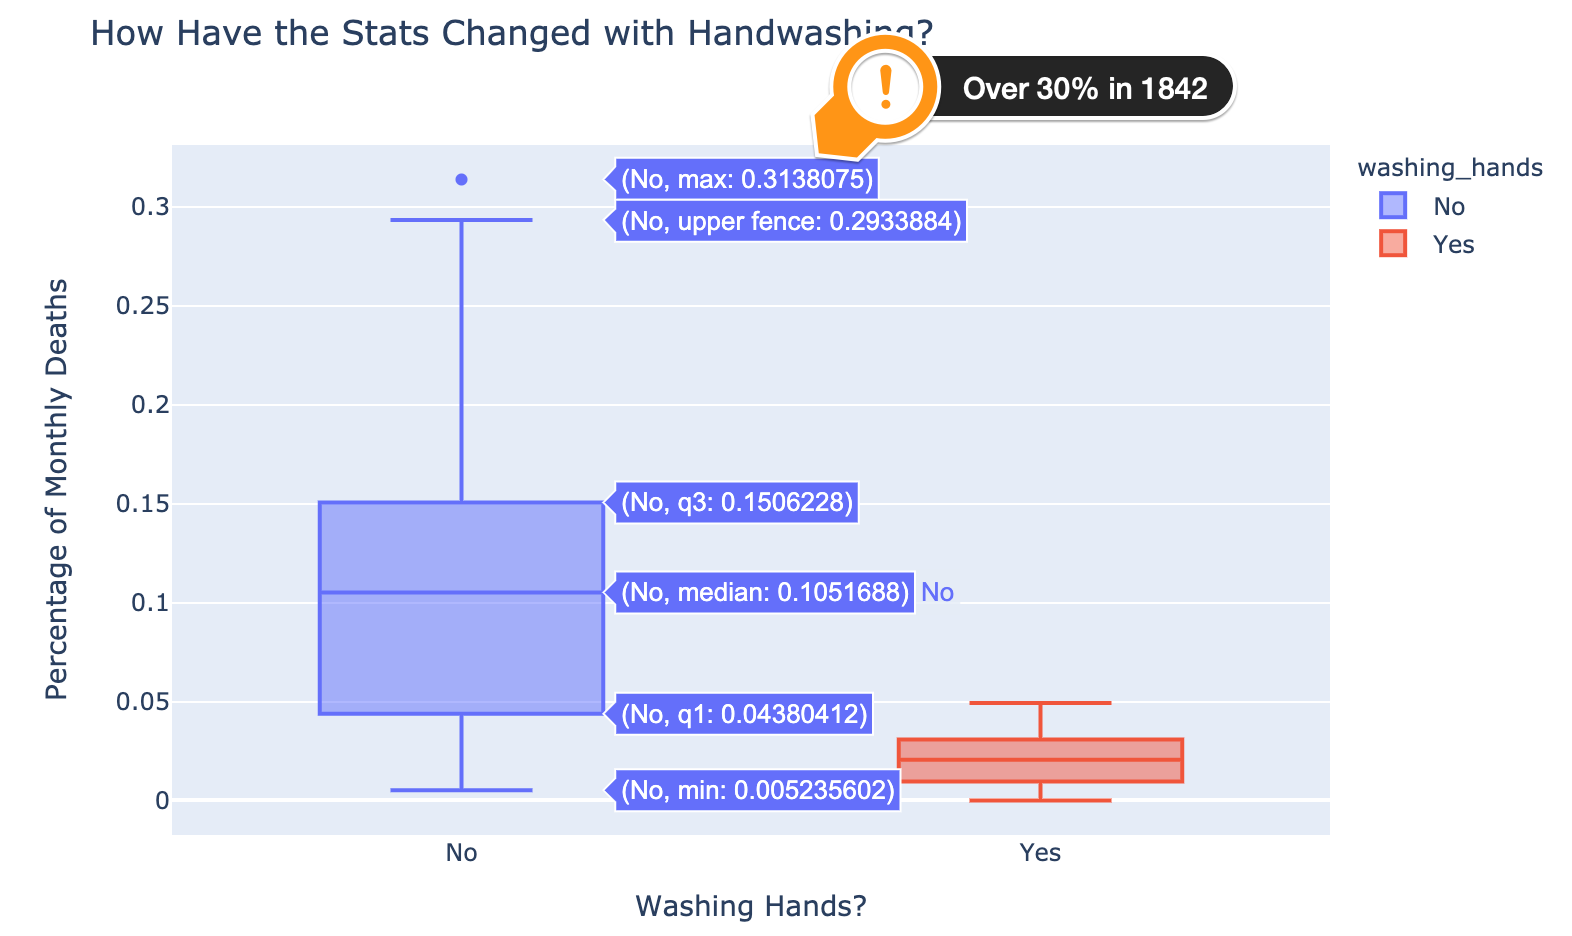

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [279]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


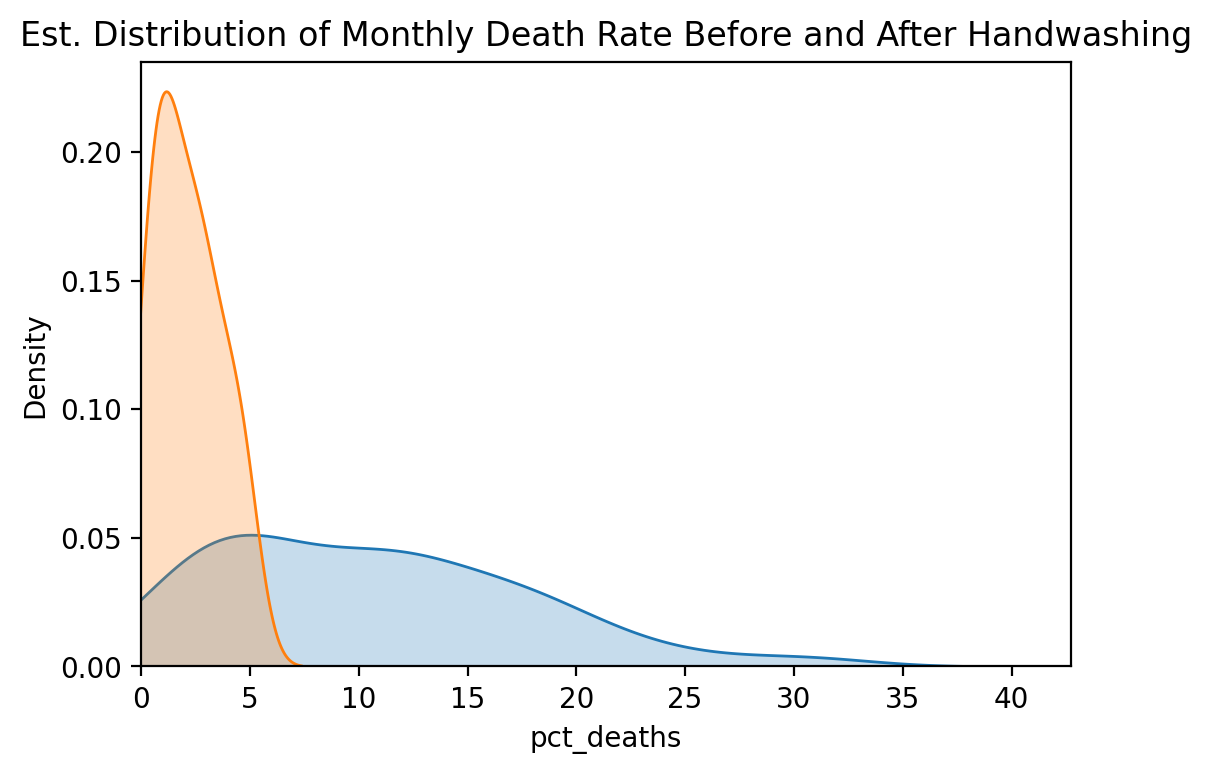

In [293]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0)
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [294]:
import scipy.stats as stats

In [295]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>

When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant and we can go ahead on publish our research paper.

The Tragic Story of Dr Semmelweis

Gather round, gather round. Now I'll tell you how our story ends. Despite the incredible evidence in favour of Dr Semmelweis' theory - that childbed fever was caused by some "substance" (which today we know as bacteria) from autopsy room corpses - was rejected by the medical community at the time. But why?! 

Part of the reason is that Semmelweis was not very tactful. He made it look like doctors were giving childbed fever to women (which they in fact were). This is not something people wanted to hear.

However, he also published his data in the form of long tables without any data visualisations:


The long tables made it very hard to see what's actually going on! Also, at the time statistics and statistical arguments were quite uncommon in the field of medicine.

Eventually, Dr Semmelweis belligerent campaigning made him some powerful and influential enemies. He lost his job at the Vienna hospital, and doctors gave up washing their hands with chlorine. As Dr Semmelweis grew older he got even angrier and eventually quite "strange". This was either the immense frustration or possibly a result of another disease like Alzheimer's or syphilis. In 1965, at the age of 47, Dr Semmelweis was committed to a mental asylum. And at the asylum, he was probably beaten since he eventually died of sepsis, a complication of an infection in the bloodstream. The tragic irony is that sepsis is a similar kind of disease that he fought so hard to prevent in women who died from childbed fever. It wasn't until 20 years later with Louis Pasteur's work on germ theory that Dr Semmelweis' work gained acceptance. RIP Dr Semmelweis.